# EXAMPLE: BASIC CHIPSET USAGE

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

from ChipSet import GeoChipSet

## Step 1: Create ChipSet and Explore the Source Image and Metadata.

In [2]:
# Test image courtesy of Oregon State University
in_neptune = r"/Users/ross/Documents/ChipSet_Test/orthos/OSU_Neptune_Mosaic.tif"

# Initialize a ChipSet for Neptune orthophoto.
neptune_chipset = GeoChipSet(in_neptune)

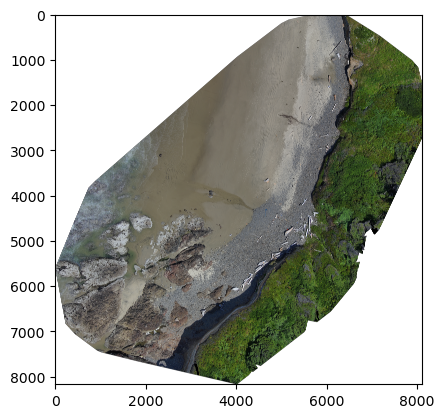

In [3]:
# First thing to check: how does our souce image look inside the ChipSet?
neptune_chipset.show_src_image()

In [4]:
# Second thing to check: Did the the geospatial metadata read correctly? Do we have image arrays?
neptune_chipset.__dict__

{'GEOCHIPSET_DTYPE': dtype([('chip', 'O'), ('chip_mask', 'O'), ('topleft_anchor', 'O'), ('is_invalid', 'O'), ('transform', 'O'), ('geom', 'O')]),
 'src_path': '/Users/ross/Documents/ChipSet_Test/orthos/OSU_Neptune_Mosaic.tif',
 'array': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

## Step 2: Create Image Chips, Explore the Results

In [5]:
# Create a stack of image chips of size 512x512 pixels from the source image. Lots of little
# details, such as image padding with NoDataValues and preserving the geospatial metadata of each
# chip will be handled behind the scenes.
# NOTE: we can specify different chip heights and width with a tuple such as: (256, 512).

neptune_chipset.stack_chips(chip_hw=512)

Kernel size of (512, 512) with image of size (8171, 8118) will result in 256 output image chips... 
Padding image by (21, 74)...
Source Image Shape (8171, 8118, 4) | Padded Image Shape: (8192, 8192, 4).
Geospatial chipping operation complete. Final chipped array shape: (256, 512, 512, 4).


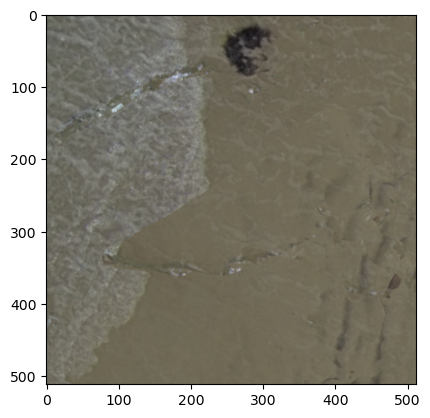

In [6]:
# We can view individual chips by pixing an index...
neptune_chipset.show_chip(100)

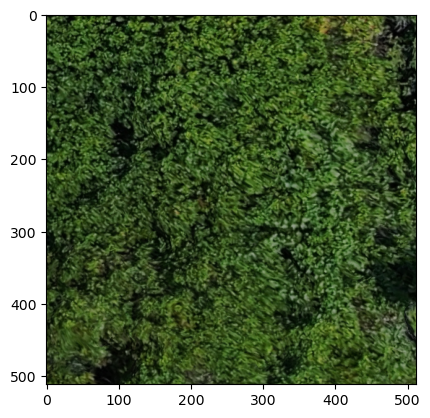

In [7]:
# Or we can print a random chip. By default masked=True, which only selects chips that contain
# valid data (it ignores chips that may consist of all no data values.).

neptune_chipset.show_random_chip(masked=True)

## Step 3: Index the ChipSet

In [8]:
# Indexing a GeoChipSet involves adding geometry information (bounding box extents) that allow chip
# location/extent to be viewed in GIS mapping software. Other chip atributes are also extracted and
# stored in an attribute table. Indexing is not always needed for ML, but is needed to save chips
# or do other processing, therefore it is left as a separate operation.
neptune_chipset.index_chipset()

self.chipset_index created.


In [9]:
# View the GeoChipSet Index's Attribute Table.
neptune_chipset.chipset_index

,order,source,geometry,y_min,x_min,y_max,x_max
0,1,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411423.240 4901850.016, 411423.240 4...",0,0,512,512
1,2,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411430.439 4901850.016, 411430.439 4...",0,512,512,1024
2,3,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411437.638 4901850.016, 411437.638 4...",0,1024,512,1536
3,4,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411444.836 4901850.016, 411444.836 4...",0,1536,512,2048
4,5,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411452.035 4901850.016, 411452.035 4...",0,2048,512,2560
...,...,...,...,...,...,...,...
251,252,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411502.426 4901742.035, 411502.426 4...",7680,5632,8192,6144
252,253,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411509.625 4901742.035, 411509.625 4...",7680,6144,8192,6656
253,254,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411516.823 4901742.035, 411516.823 4...",7680,6656,8192,7168
254,255,/Users/ross/Documents/ChipSet_Test/orthos/OSU_...,"POLYGON ((411524.022 4901742.035, 411524.022 4...",7680,7168,8192,7680


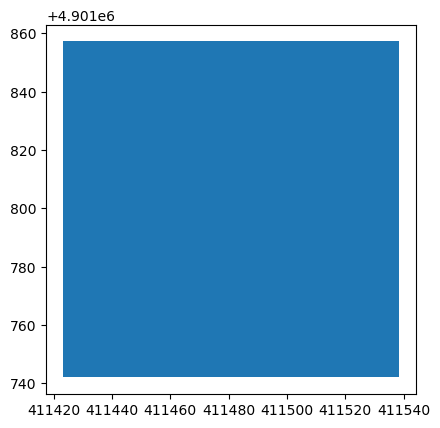

In [10]:
# View the GeoChipSet Index's Geometry. If shown on a map, this would be the "bounding box" that
# surrounds all the chips in the GeoChipSet. Each chip also has it's own geometry and can be
# displayed independetly.
neptune_chipset.show_chipset_index()

## Step 4: Write Chips, Indexes, and Metadata to Disk

In [11]:
# Specify an ouput folder
out_neptune = r"/Users/ross/Documents/ChipSet_Test/chips/neptune"

# write chips and chip index with each chip's spatial metadata.
neptune_chipset.save_chipset_index(out_neptune)
neptune_chipset.save_chips(out_neptune)

Writing chips to disk...
Writing chip 0.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_0.tif
Writing chip 1.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_512.tif
Writing chip 2.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_1024.tif
Writing chip 3.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_1536.tif
Writing chip 4.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_2048.tif
Writing chip 5.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_2560.tif
Writing chip 6.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_3072.tif
Writing chip 7.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_3584.tif
Writing chip 8.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_4096.tif
Writing chip 9.
/Users/ross/Documents/ChipSet_Test/chips/neptune/OSU_Neptune_Mosaic_0_4608.tif
Writing chip 10.
/Users/ross/

## UNDER CONSTRUCTION Step 5: Use Chips in Machine Learning

## UNDER CONSTRUCTION Step 6: Relate bounding boxes from ML object detection back to source image orthomosaic.